In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import menzalib as mz

In [2]:
ty,Iy=np.loadtxt('2_Theta_par.txt',unpack=True)
tx,Ix=np.loadtxt('2_Theta_perp.txt',unpack=True)
tx=tx-180
ty=ty-180
def gauss(x,x_0,sigma,A):
    return A*np.exp(-(x-x_0)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

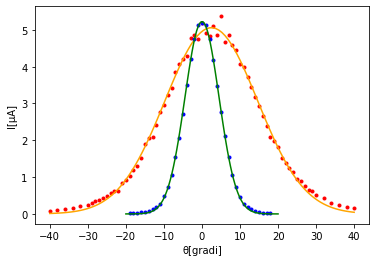

In [3]:
popt,pcov=curve_fit(gauss,tx,Ix,p0=[0,10,50])
x=np.linspace(-40,40,100)
y=gauss(x,*popt)
plt.plot(tx,Ix,'r.')
plt.plot(x,y,'-',color='orange')
sigmax,dsigmax=popt[1],pcov[1][1]

popt,pcov=curve_fit(gauss,ty,Iy,p0=[0,20,100])
x=np.linspace(-20,20,100)
y=gauss(x,*popt)
plt.plot(ty,Iy,'b.')
plt.plot(x,y,color='green')
sigmay,dsigmay=popt[1],pcov[1][1]


plt.ylabel('I[µA]')
plt.xlabel('θ[gradi]')
plt.savefig('cosa_radiale.eps',format='eps')

In [4]:
print(mz.ne_tex(sigmax,dsigmax))
print(mz.ne_tex(sigmay,dsigmay))
sigmax=sigmax*np.pi/180
sigmay=sigmay*np.pi/180

$(1.2207 \pm 0.0007) \times 10^{1}$
$4.4795 \pm 0.0002$


In [11]:
lambmin,lambmax=770e-9,795e-9
lamb,dlamb=(lambmin+lambmax)/2,(lambmax-lambmin)/2
Ax,dAx=lamb/(2*np.pi*sigmax),mz.drapp(lamb,dlamb,sigmax,dsigmax)/(2*np.pi)
Ay,dAy=lamb/(2*np.pi*sigmay),mz.drapp(lamb,dlamb,sigmay,dsigmay)/(2*np.pi)

print(mz.ne_tex(Ax,dAx))
print(mz.ne_tex(Ay,dAy))
print(mz.ne_tex(lamb,dlamb,'m'))

$(5.8 \pm 0.2) \times 10^{-7}$
$(1.59 \pm 0.03) \times 10^{-6}$
$780 \pm 10$nm


# Parte 3

In [7]:
print(Ax,dAx)
#T,dT,lamb,dlamb=np.loadtxt('3_Lambda_vs_t.txt')

2.922813125512182e-07 1.38342789278541e-07
